In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [3]:
df = pd.read_csv('auto-mpg.csv')
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [6]:
df['origin'].unique()

array([1, 3, 2])

# Data Cleaning

In [8]:
# horsepower -------------------------------------------

In [9]:
df['horsepower'].value_counts()

horsepower
150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: count, Length: 94, dtype: int64

In [10]:
df['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [11]:
df['horsepower'] = df['horsepower'].replace('?', np.nan)

In [12]:
df['horsepower'] = pd.to_numeric(df['horsepower'])

In [13]:
df['horsepower'].mean()

104.46938775510205

In [14]:
df['horsepower'].median()

93.5

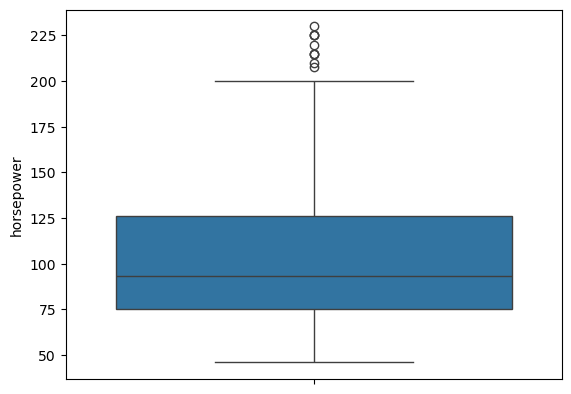

In [15]:
sns.boxplot(df['horsepower'])
plt.show()

In [16]:
df['horsepower'] = df['horsepower'].fillna(df['horsepower'].median())

In [17]:
df['horsepower'].unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [18]:
df['horsepower'].dtype

dtype('float64')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


In [20]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
mpg,398.0,23.514573,7.815984,9.0,17.500,23.0,29.000,46.6
cylinders,398.0,5.454774,1.701004,3.0,4.000,4.0,8.000,8.0
displacement,398.0,193.425879,104.269838,68.0,104.250,148.5,262.000,455.0
horsepower,398.0,104.304020,38.222625,46.0,76.000,93.5,125.000,230.0
weight,398.0,2970.424623,846.841774,1613.0,2223.750,2803.5,3608.000,5140.0
acceleration,398.0,15.568090,2.757689,8.0,13.825,15.5,17.175,24.8
model year,398.0,76.010050,3.697627,70.0,73.000,76.0,79.000,82.0
origin,398.0,1.572864,0.802055,1.0,1.000,1.0,2.000,3.0


In [21]:
# origin -------------------------------------------

In [22]:
df.origin.value_counts()

origin
1    249
3     79
2     70
Name: count, dtype: int64

In [23]:
df = pd.get_dummies(data = df, columns=['origin'], prefix = 'origin', dtype = int)

In [24]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_1,origin_2,origin_3
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [25]:
df.rename(columns = {'origin_1' : 'origin_USA',
                    'origin_2' : 'origin_Europe',
                    'origin_3' : 'origin_Japan'},inplace = True)

In [26]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,car name,origin_USA,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,70,chevrolet chevelle malibu,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,buick skylark 320,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,plymouth satellite,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,amc rebel sst,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,ford torino,1,0,0


In [27]:
# car name -------------------------------------------

In [28]:
df.drop('car name', axis = 1, inplace = True)

In [29]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_USA,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,0,0


In [30]:
# model year -------------------------------------------

In [31]:
df['model year'].unique()

array([70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82])

In [32]:
df['model year'] =  df['model year'].apply(lambda x: x + 1900)

In [33]:
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_USA,origin_Europe,origin_Japan
0,18.0,8,307.0,130.0,3504,12.0,1970,1,0,0
1,15.0,8,350.0,165.0,3693,11.5,1970,1,0,0
2,18.0,8,318.0,150.0,3436,11.0,1970,1,0,0
3,16.0,8,304.0,150.0,3433,12.0,1970,1,0,0
4,17.0,8,302.0,140.0,3449,10.5,1970,1,0,0


In [34]:
df['model year'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1982])

# EDA

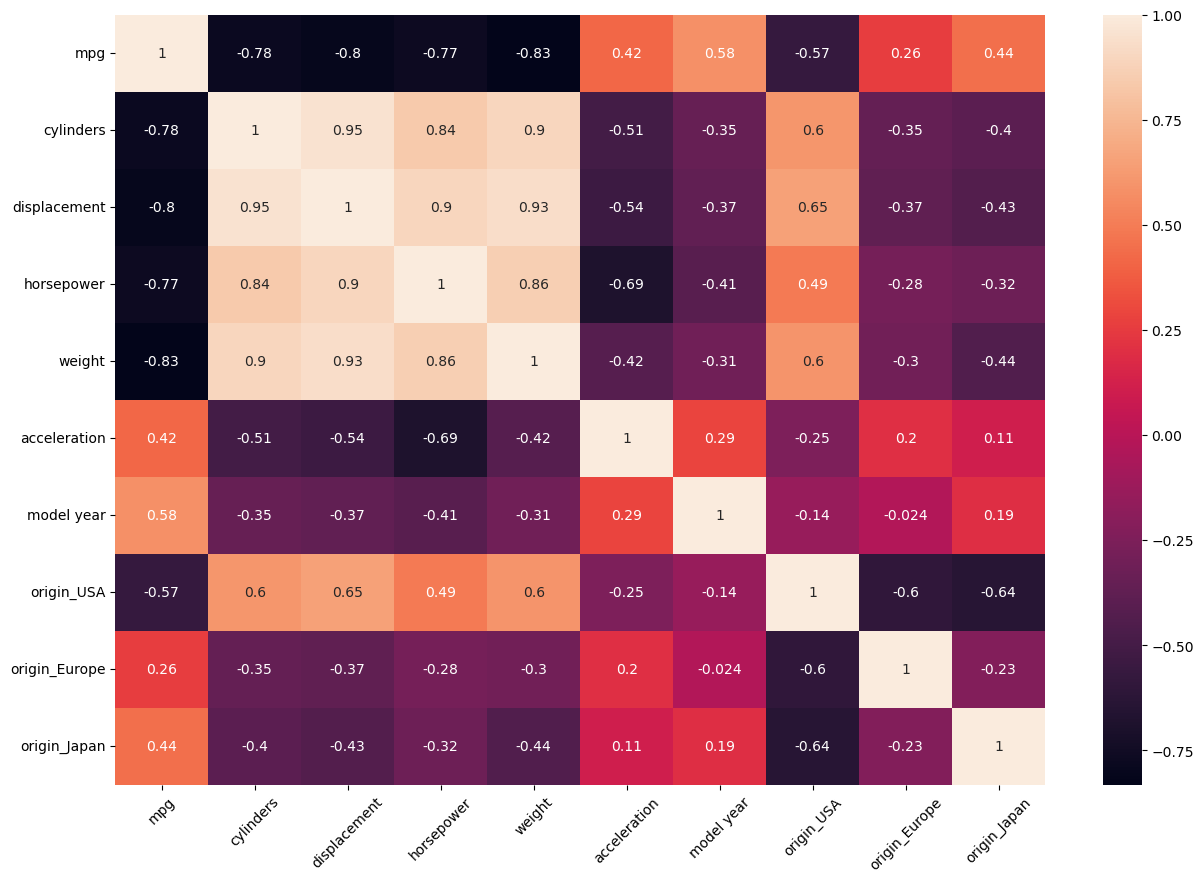

In [106]:
plt.figure(figsize = (15,10))
sns.heatmap(df.corr(),annot = True)
plt.xticks(rotation=45)
plt.show()

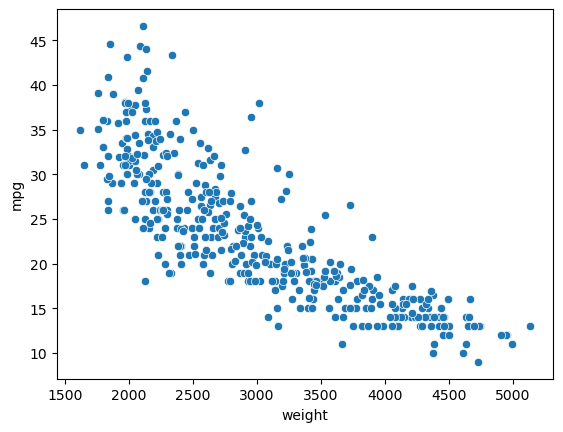

In [110]:
sns.scatterplot(x = 'weight', y = 'mpg', data = df)
plt.show()

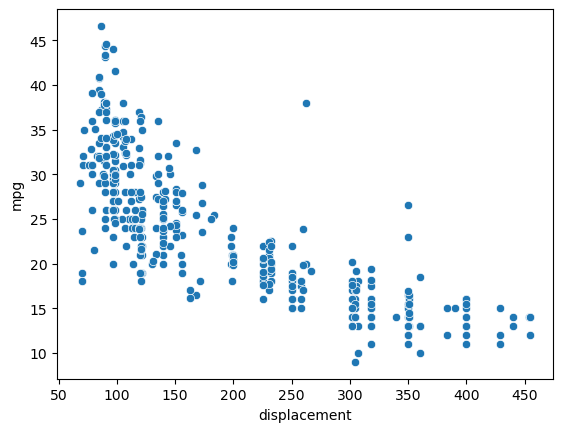

In [38]:
sns.scatterplot(x = 'displacement', y = 'mpg', data = df)
plt.show()

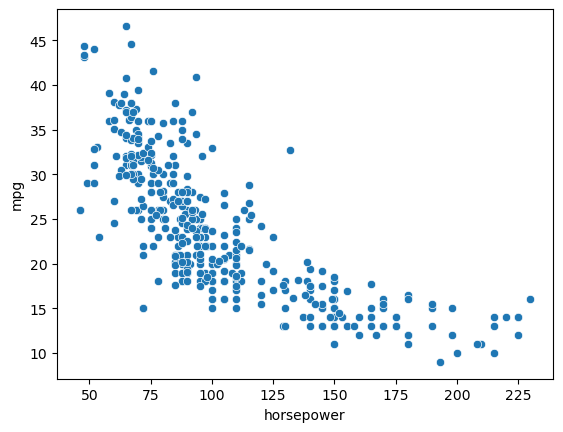

In [39]:
sns.scatterplot(x = 'horsepower',y = 'mpg', data=df)
plt.show()

# Linear Regression Model

In [41]:
X = df.drop(columns = ['mpg'])
y = df['mpg']

In [42]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [43]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [44]:
# linear regression
from sklearn.linear_model import LinearRegression

regression = LinearRegression()
regression.fit(X_train_scaled, y_train)

LinearRegression()

mae: 2.288158726714093
mse: 8.338657478621611
r2 score: 0.8449096332762085
adjusted r2 score: 0.8249694432688639


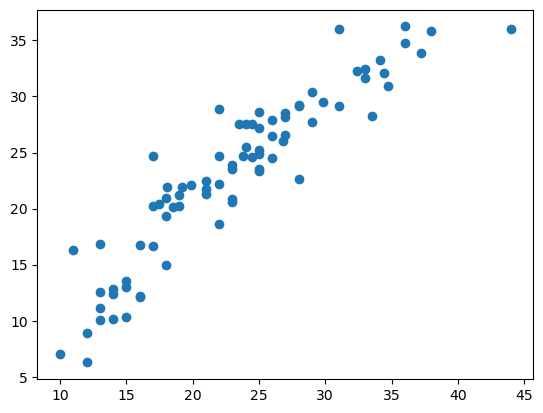

In [45]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

y_pred = regression.predict(X_test_scaled)

mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
# adjusted r2 score
n = X_test.shape[0]
p = X_test.shape[1]
adj_r2 = 1 - (1-score)*(n-1)/(n-p-1)
print('adjusted r2 score:', adj_r2)

plt.scatter(y_test,y_pred)
plt.show()

# Lasso, Ridge, ElasticNet Regression

mae: 2.2515865750073827
mse: 8.654283683061303
r2 score: 0.8390393137529892


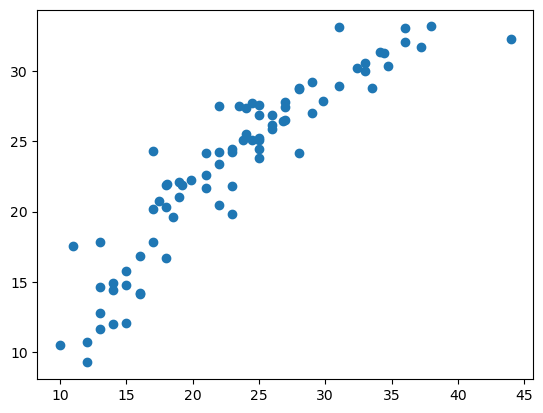

In [47]:
# lasso 
from sklearn.linear_model import Lasso

lasso = Lasso()
lasso.fit(X_train_scaled,y_train)
y_pred = lasso.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

mae: 2.28405623955524
mse: 8.341750953934561
r2 score: 0.844852097848957


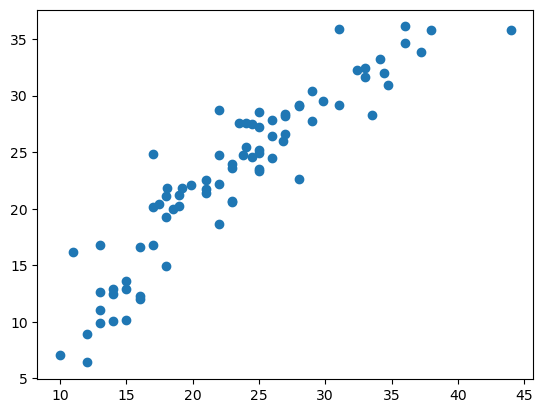

In [48]:
# ridge
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred = ridge.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

mae: 2.341494802007379
mse: 9.63339317295166
r2 score: 0.8208288943612407


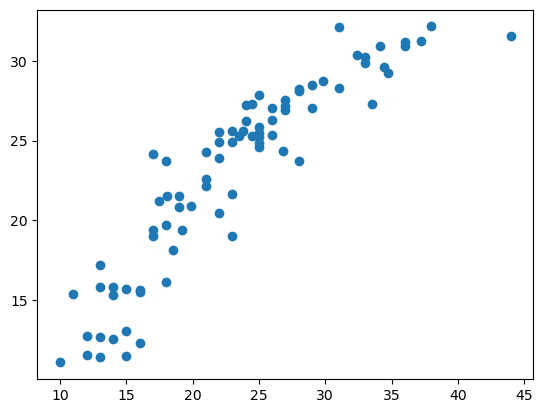

In [49]:
# elasticnet 
from sklearn.linear_model import ElasticNet

elastic = ElasticNet()
elastic.fit(X_train_scaled,y_train)
y_pred = elastic.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

# Cross-Validation

mae: 2.284728118501465
mse: 8.44416587857808
r2 score: 0.8429472866414365


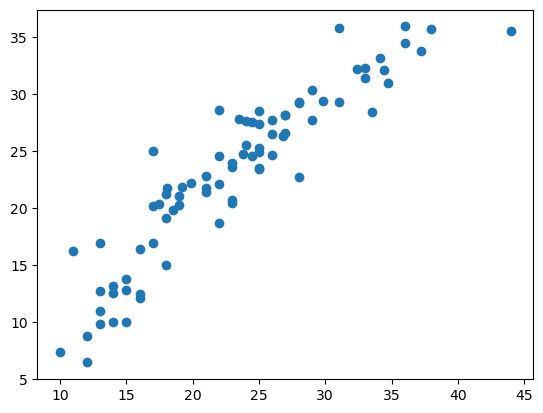

In [51]:
# lasso cross validation
from sklearn.linear_model import LassoCV

lassoCV = LassoCV(cv=5)
lassoCV.fit(X_train_scaled,y_train)
y_pred = lassoCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

mae: 2.28405623955524
mse: 8.341750953934561
r2 score: 0.844852097848957


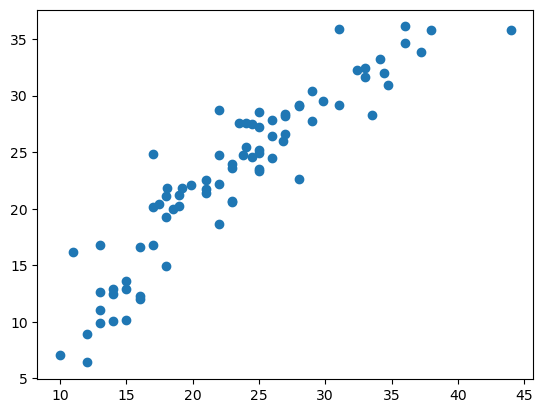

In [52]:
# ridge cross validation
from sklearn.linear_model import RidgeCV

ridgeCV = RidgeCV(cv=5)
ridgeCV.fit(X_train_scaled,y_train)
y_pred = ridgeCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

mae: 2.2822517869323513
mse: 8.40165372047079
r2 score: 0.8437379686196785


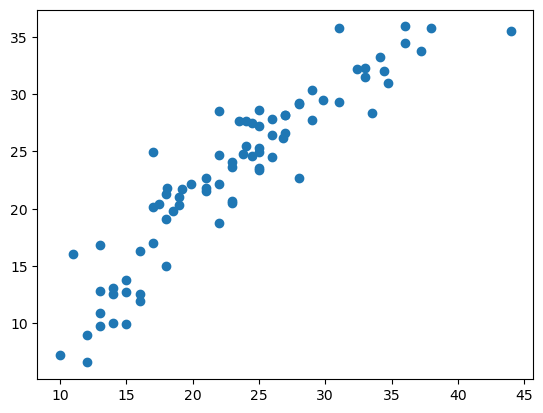

In [53]:
# elastic net cross validation
from sklearn.linear_model import ElasticNetCV

elasticnetCV = ElasticNetCV(cv=5)
elasticnetCV.fit(X_train_scaled,y_train)
y_pred = elasticnetCV.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('mae:',mae)
print('mse:',mse)
print('r2 score:',score)
plt.scatter(y_test,y_pred)
plt.show()

# Lazy Predict

In [55]:
# lazy fit
#!pip install lazypredict

from lazypredict.Supervised import LazyRegressor
from sklearn import datasets
from sklearn.utils import shuffle
import numpy as np

reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train, y_test)

print(models)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000080 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 292
[LightGBM] [Info] Number of data points in the train set: 318, number of used features: 9
[LightGBM] [Info] Start training from score 23.608176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -i